In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [54]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


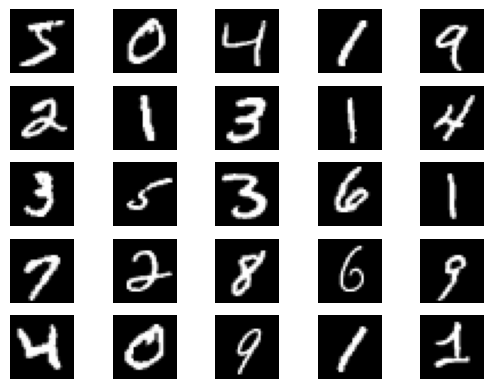

In [86]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=5)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train_images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

In [69]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [71]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dense_37 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [79]:

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [80]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2615 - accuracy: 0.9257 - val_loss: 0.1292 - val_accuracy: 0.9617
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1069 - accuracy: 0.9689 - val_loss: 0.0947 - val_accuracy: 0.9713
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0704 - accuracy: 0.9790 - val_loss: 0.0789 - val_accuracy: 0.9751
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0734 - val_accuracy: 0.9765
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0381 - accuracy: 0.9889 - val_loss: 0.0720 - val_accuracy: 0.9788
Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0641 - val_accuracy: 0.9800
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0219 - accuracy: 0.9937 - val_loss: 0.0605 - val_accuracy: 0.9812
Epoch 

In [85]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/mul' defined at (most recent call last):
    File "C:\Users\kisio\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\kisio\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\kisio\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\kisio\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\kisio\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\kisio\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\kisio\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\kisio\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\kisio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\kisio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\kisio\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\kisio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\kisio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\kisio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\kisio\AppData\Local\Temp\ipykernel_12060\702604380.py", line 1, in <module>
      test_loss, test_acc = model.evaluate(test_images, test_labels)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\engine\training.py", line 2040, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function
      return step_function(self, iterator)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step
      outputs = model.test_step(data)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\engine\training.py", line 1758, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\kisio\anaconda3\lib\site-packages\keras\backend.py", line 5547, in categorical_crossentropy
      return -tf.reduce_sum(target * tf.math.log(output), axis)
Node: 'categorical_crossentropy/mul'
Incompatible shapes: [32,10] vs. [32,10,2,2,2]
	 [[{{node categorical_crossentropy/mul}}]] [Op:__inference_test_function_27228]

In [84]:
model.save('dnn_model.h5')


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


In [ ]:
model.save('cnn_model.h5')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved CNN model
from tensorflow.keras.models import load_model
cnn_model = load_model('my_cnn_model.h5')

# Make predictions on the test set
predictions = cnn_model.predict(x_test)

# Plot the first 25 test images and their predicted labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()
